In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
latent_dim = 100
batch_size = 128
epochs = 50
learning_rate = 0.0002

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 48.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.81MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.21MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

In [ ]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

In [ ]:
g_loss_list = []
d_loss_list = []

def generate_and_save_images(epoch):
    with torch.no_grad():
        noise = torch.randn(64, latent_dim).to(device)
        fake_images = generator(noise)
        fake_images = (fake_images + 1) / 2  # Rescale to [0, 1]
        grid = make_grid(fake_images, nrow=8, normalize=True)
        plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
        plt.axis('off')
        plt.title(f"Epoch {epoch}")
        plt.show()


Epoch [1/50] Batch 0/469: D Loss: 0.0372, G Loss: 4.6148
Epoch [1/50] Batch 200/469: D Loss: 1.7305, G Loss: 0.2466
Epoch [1/50] Batch 400/469: D Loss: 0.3567, G Loss: 3.5037


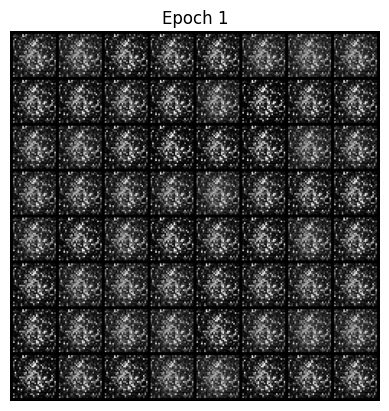

Epoch [2/50] Batch 0/469: D Loss: 0.2257, G Loss: 4.9795
Epoch [2/50] Batch 200/469: D Loss: 0.6007, G Loss: 4.4519
Epoch [2/50] Batch 400/469: D Loss: 0.0443, G Loss: 6.0805


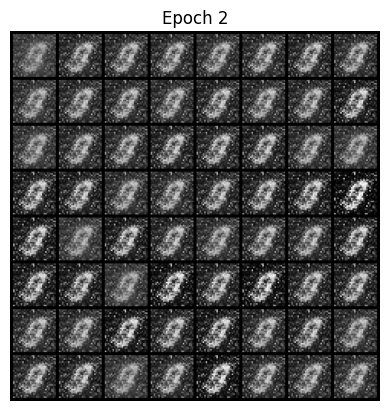

Epoch [3/50] Batch 0/469: D Loss: 0.5514, G Loss: 9.9229
Epoch [3/50] Batch 200/469: D Loss: 0.1835, G Loss: 4.9826
Epoch [3/50] Batch 400/469: D Loss: 0.1051, G Loss: 5.2777


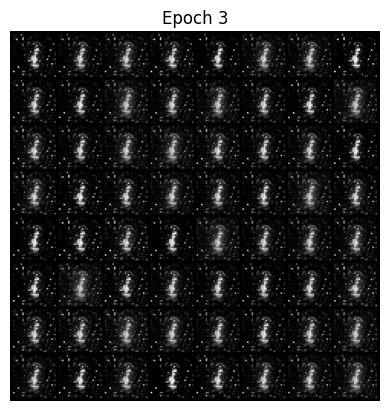

Epoch [4/50] Batch 0/469: D Loss: 0.2526, G Loss: 4.7932
Epoch [4/50] Batch 200/469: D Loss: 0.2088, G Loss: 3.1966
Epoch [4/50] Batch 400/469: D Loss: 0.1752, G Loss: 3.6286


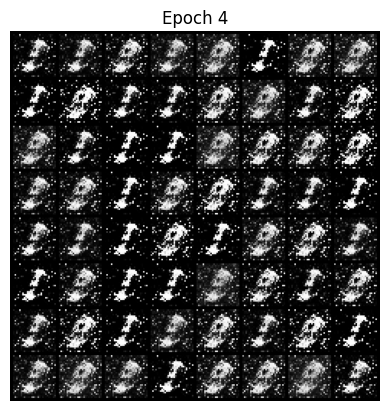

Epoch [5/50] Batch 0/469: D Loss: 0.0899, G Loss: 5.6226
Epoch [5/50] Batch 200/469: D Loss: 0.1966, G Loss: 4.4806
Epoch [5/50] Batch 400/469: D Loss: 0.5136, G Loss: 3.1238


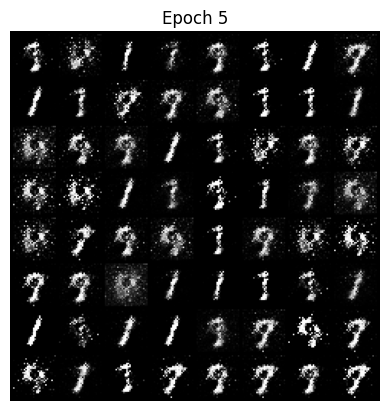

Epoch [6/50] Batch 0/469: D Loss: 0.4473, G Loss: 3.5101
Epoch [6/50] Batch 200/469: D Loss: 0.2794, G Loss: 3.3623
Epoch [6/50] Batch 400/469: D Loss: 0.3126, G Loss: 2.3534


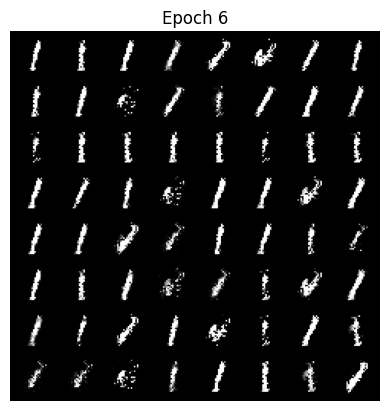

Epoch [7/50] Batch 0/469: D Loss: 0.3305, G Loss: 3.9662
Epoch [7/50] Batch 200/469: D Loss: 0.1828, G Loss: 3.1105
Epoch [7/50] Batch 400/469: D Loss: 0.1666, G Loss: 3.8495


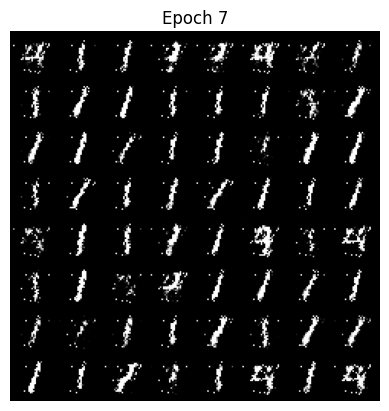

Epoch [8/50] Batch 0/469: D Loss: 0.1532, G Loss: 3.6858
Epoch [8/50] Batch 200/469: D Loss: 0.1704, G Loss: 3.5276
Epoch [8/50] Batch 400/469: D Loss: 0.2428, G Loss: 2.8611


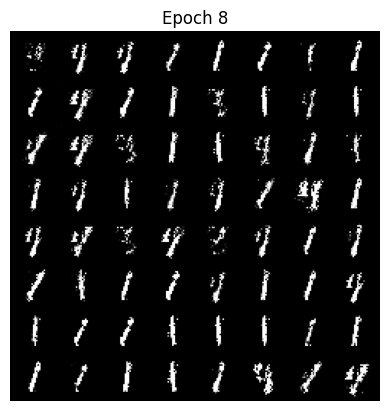

Epoch [9/50] Batch 0/469: D Loss: 0.2676, G Loss: 2.5849
Epoch [9/50] Batch 200/469: D Loss: 0.3811, G Loss: 2.9697
Epoch [9/50] Batch 400/469: D Loss: 0.2551, G Loss: 2.8424


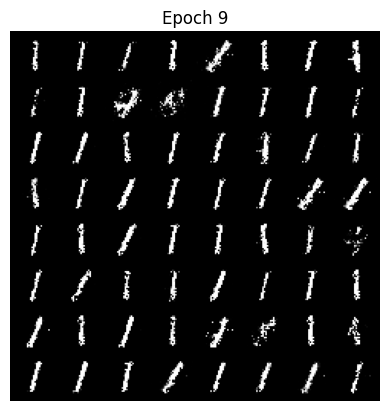

Epoch [10/50] Batch 0/469: D Loss: 0.3520, G Loss: 3.2513
Epoch [10/50] Batch 200/469: D Loss: 0.4143, G Loss: 2.1677
Epoch [10/50] Batch 400/469: D Loss: 0.4954, G Loss: 3.3492


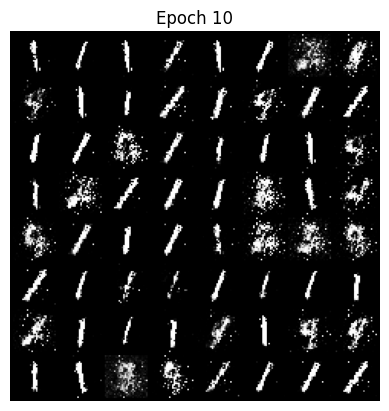

Epoch [11/50] Batch 0/469: D Loss: 0.3707, G Loss: 2.5221
Epoch [11/50] Batch 200/469: D Loss: 0.5926, G Loss: 1.6882
Epoch [11/50] Batch 400/469: D Loss: 0.6808, G Loss: 1.5209


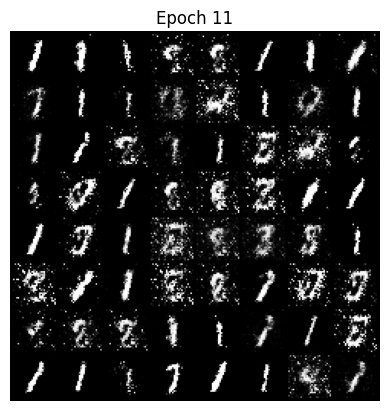

Epoch [12/50] Batch 0/469: D Loss: 0.6671, G Loss: 2.2297
Epoch [12/50] Batch 200/469: D Loss: 0.7163, G Loss: 1.5558
Epoch [12/50] Batch 400/469: D Loss: 0.8885, G Loss: 1.6444


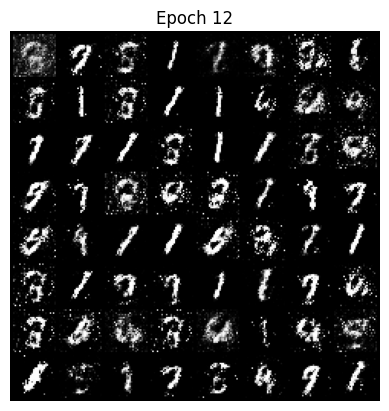

Epoch [13/50] Batch 0/469: D Loss: 1.1365, G Loss: 1.3968
Epoch [13/50] Batch 200/469: D Loss: 0.9470, G Loss: 1.2754
Epoch [13/50] Batch 400/469: D Loss: 0.7980, G Loss: 1.5273


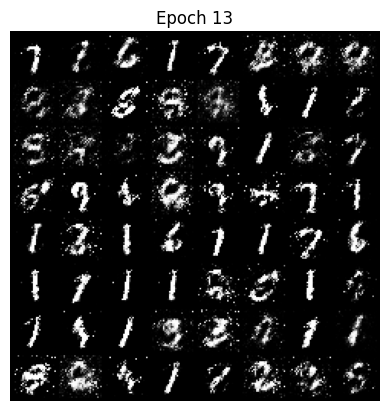

Epoch [14/50] Batch 0/469: D Loss: 0.8516, G Loss: 1.9413
Epoch [14/50] Batch 200/469: D Loss: 0.8495, G Loss: 2.4715
Epoch [14/50] Batch 400/469: D Loss: 0.7832, G Loss: 1.7472


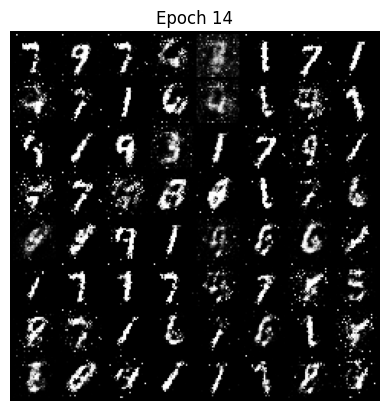

Epoch [15/50] Batch 0/469: D Loss: 0.9580, G Loss: 1.7149
Epoch [15/50] Batch 200/469: D Loss: 1.0540, G Loss: 1.3316
Epoch [15/50] Batch 400/469: D Loss: 0.8573, G Loss: 1.5142


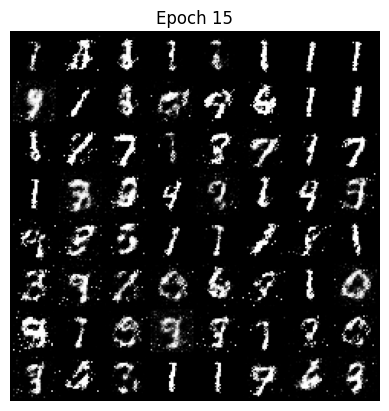

Epoch [16/50] Batch 0/469: D Loss: 0.8936, G Loss: 1.9500
Epoch [16/50] Batch 200/469: D Loss: 0.9240, G Loss: 1.6088
Epoch [16/50] Batch 400/469: D Loss: 0.9229, G Loss: 1.2360


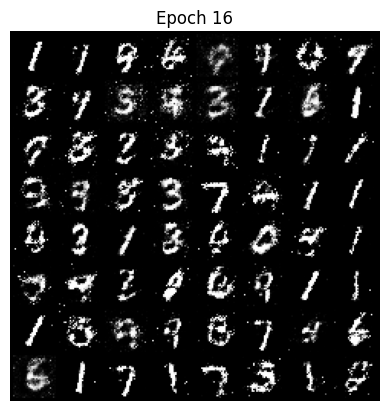

Epoch [17/50] Batch 0/469: D Loss: 0.9918, G Loss: 0.8766
Epoch [17/50] Batch 200/469: D Loss: 0.7290, G Loss: 1.7329
Epoch [17/50] Batch 400/469: D Loss: 1.1043, G Loss: 1.5024


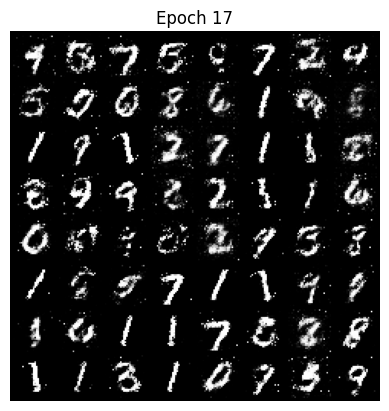

Epoch [18/50] Batch 0/469: D Loss: 1.0498, G Loss: 1.3717
Epoch [18/50] Batch 200/469: D Loss: 1.0572, G Loss: 1.3127
Epoch [18/50] Batch 400/469: D Loss: 1.1209, G Loss: 1.4407


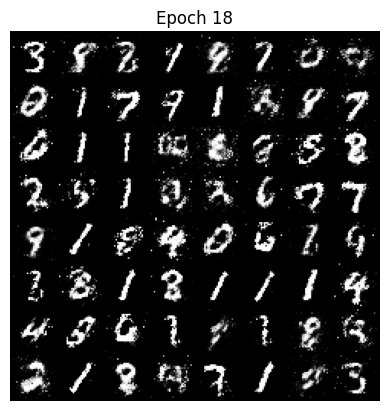

Epoch [19/50] Batch 0/469: D Loss: 1.0164, G Loss: 1.2860
Epoch [19/50] Batch 200/469: D Loss: 0.9902, G Loss: 1.0314
Epoch [19/50] Batch 400/469: D Loss: 1.0532, G Loss: 1.2426


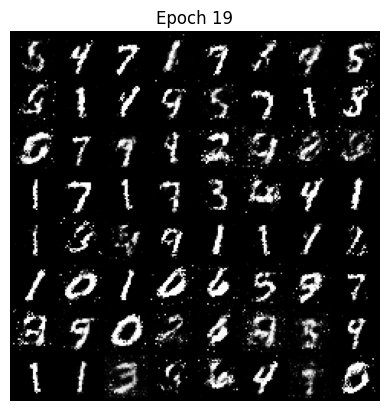

Epoch [20/50] Batch 0/469: D Loss: 1.0352, G Loss: 1.1637
Epoch [20/50] Batch 200/469: D Loss: 1.0280, G Loss: 1.5263
Epoch [20/50] Batch 400/469: D Loss: 0.9888, G Loss: 1.3527


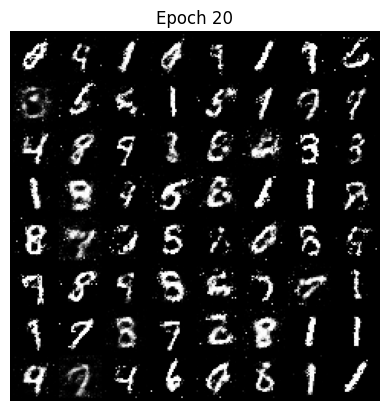

Epoch [21/50] Batch 0/469: D Loss: 1.0896, G Loss: 1.2408
Epoch [21/50] Batch 200/469: D Loss: 1.0354, G Loss: 1.1317
Epoch [21/50] Batch 400/469: D Loss: 1.3061, G Loss: 1.9326


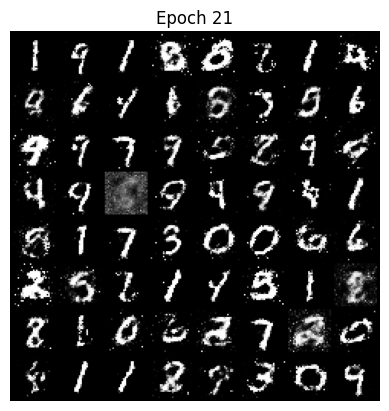

Epoch [22/50] Batch 0/469: D Loss: 1.1009, G Loss: 0.9456
Epoch [22/50] Batch 200/469: D Loss: 1.0769, G Loss: 1.1696
Epoch [22/50] Batch 400/469: D Loss: 0.9904, G Loss: 1.3746


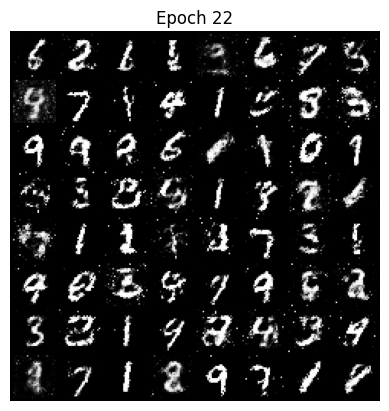

Epoch [23/50] Batch 0/469: D Loss: 1.0433, G Loss: 1.1515
Epoch [23/50] Batch 200/469: D Loss: 1.1056, G Loss: 1.2653
Epoch [23/50] Batch 400/469: D Loss: 1.1050, G Loss: 1.1900


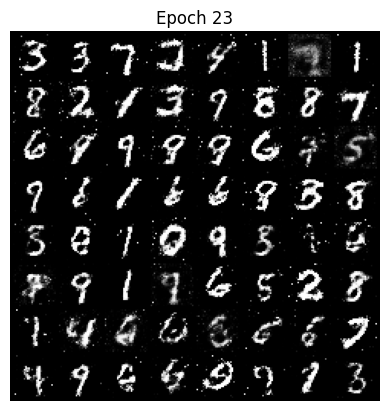

Epoch [24/50] Batch 0/469: D Loss: 1.1553, G Loss: 1.1029
Epoch [24/50] Batch 200/469: D Loss: 1.0582, G Loss: 0.9693
Epoch [24/50] Batch 400/469: D Loss: 1.1085, G Loss: 1.1702


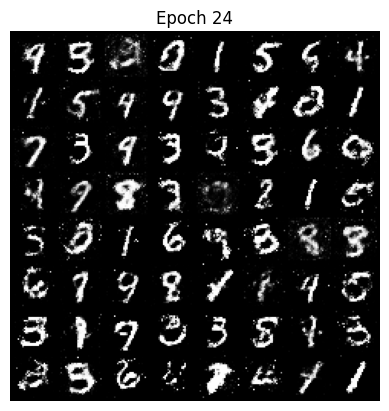

Epoch [25/50] Batch 0/469: D Loss: 1.1311, G Loss: 0.9929
Epoch [25/50] Batch 200/469: D Loss: 0.9780, G Loss: 1.0461
Epoch [25/50] Batch 400/469: D Loss: 1.0407, G Loss: 1.2952


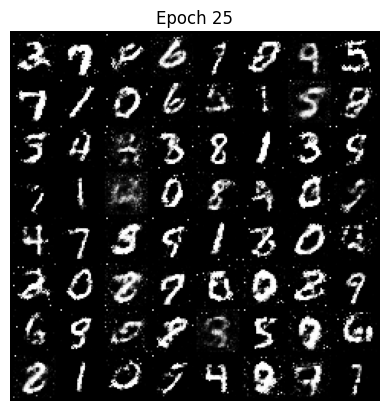

Epoch [26/50] Batch 0/469: D Loss: 1.0834, G Loss: 1.2658
Epoch [26/50] Batch 200/469: D Loss: 1.2165, G Loss: 0.8825
Epoch [26/50] Batch 400/469: D Loss: 1.0976, G Loss: 1.1242


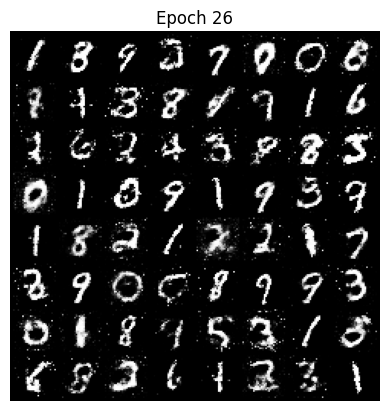

Epoch [27/50] Batch 0/469: D Loss: 1.2266, G Loss: 0.9345
Epoch [27/50] Batch 200/469: D Loss: 1.2964, G Loss: 0.8516
Epoch [27/50] Batch 400/469: D Loss: 1.2457, G Loss: 0.9726


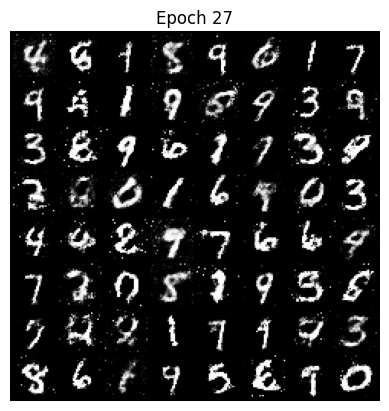

Epoch [28/50] Batch 0/469: D Loss: 1.1805, G Loss: 1.1344
Epoch [28/50] Batch 200/469: D Loss: 1.1476, G Loss: 1.0043
Epoch [28/50] Batch 400/469: D Loss: 1.1375, G Loss: 1.1023


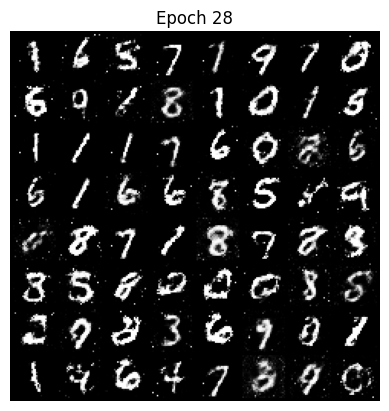

Epoch [29/50] Batch 0/469: D Loss: 1.1413, G Loss: 0.9674
Epoch [29/50] Batch 200/469: D Loss: 1.1761, G Loss: 0.9450
Epoch [29/50] Batch 400/469: D Loss: 1.1630, G Loss: 1.0343


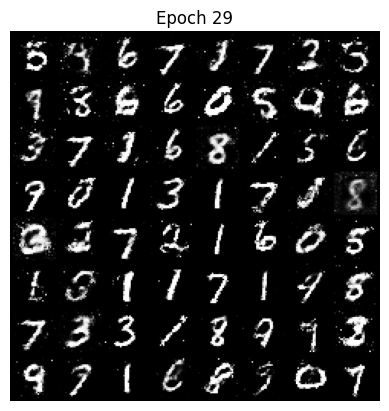

Epoch [30/50] Batch 0/469: D Loss: 1.1567, G Loss: 1.1213
Epoch [30/50] Batch 200/469: D Loss: 1.1561, G Loss: 1.0223
Epoch [30/50] Batch 400/469: D Loss: 1.2150, G Loss: 1.3328


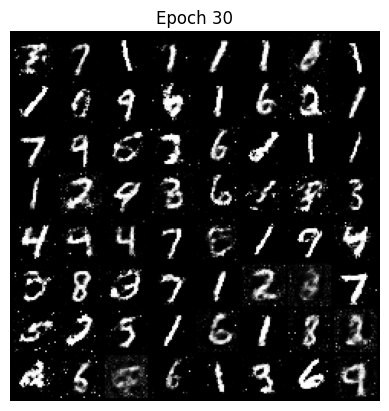

Epoch [31/50] Batch 0/469: D Loss: 1.0304, G Loss: 0.9045
Epoch [31/50] Batch 200/469: D Loss: 1.1363, G Loss: 1.3485
Epoch [31/50] Batch 400/469: D Loss: 1.1983, G Loss: 1.1619


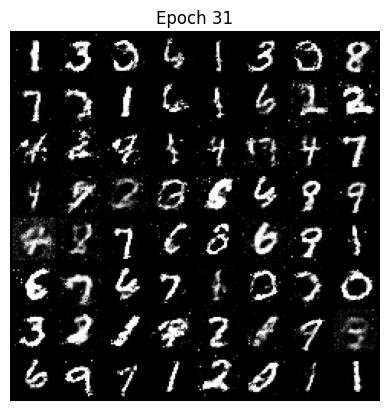

Epoch [32/50] Batch 0/469: D Loss: 1.1639, G Loss: 1.2271
Epoch [32/50] Batch 200/469: D Loss: 1.1176, G Loss: 1.2252
Epoch [32/50] Batch 400/469: D Loss: 1.2528, G Loss: 0.8567


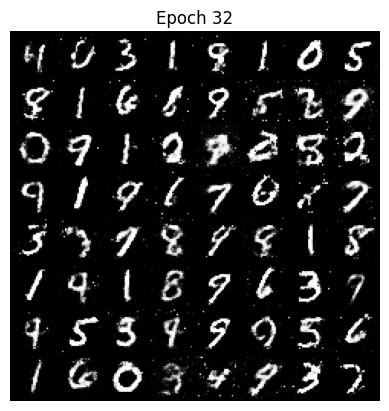

Epoch [33/50] Batch 0/469: D Loss: 1.1103, G Loss: 1.1742
Epoch [33/50] Batch 200/469: D Loss: 1.2090, G Loss: 1.0249
Epoch [33/50] Batch 400/469: D Loss: 1.1845, G Loss: 0.9339


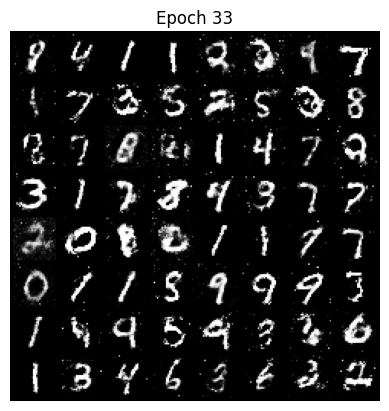

Epoch [34/50] Batch 0/469: D Loss: 1.2457, G Loss: 1.0906
Epoch [34/50] Batch 200/469: D Loss: 1.1247, G Loss: 1.2280
Epoch [34/50] Batch 400/469: D Loss: 1.1825, G Loss: 0.8564


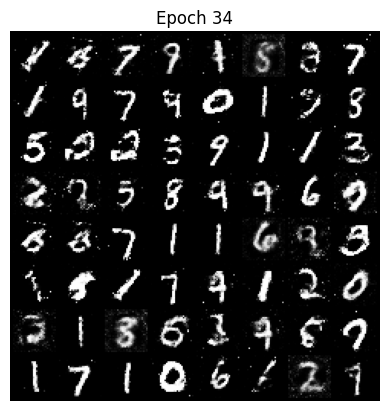

Epoch [35/50] Batch 0/469: D Loss: 1.0945, G Loss: 0.8454
Epoch [35/50] Batch 200/469: D Loss: 1.1513, G Loss: 1.1334
Epoch [35/50] Batch 400/469: D Loss: 1.1962, G Loss: 0.9305


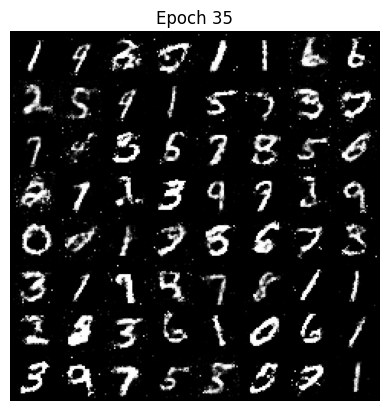

Epoch [36/50] Batch 0/469: D Loss: 1.1730, G Loss: 0.9394
Epoch [36/50] Batch 200/469: D Loss: 1.2699, G Loss: 1.2395
Epoch [36/50] Batch 400/469: D Loss: 1.2109, G Loss: 0.8806


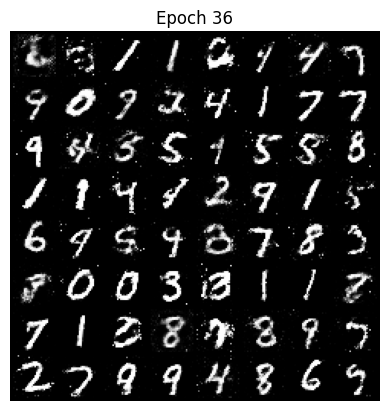

Epoch [37/50] Batch 0/469: D Loss: 1.2211, G Loss: 1.3389
Epoch [37/50] Batch 200/469: D Loss: 1.2062, G Loss: 1.1314
Epoch [37/50] Batch 400/469: D Loss: 1.1398, G Loss: 1.1905


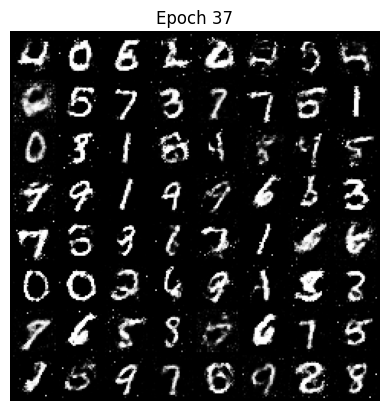

Epoch [38/50] Batch 0/469: D Loss: 1.2168, G Loss: 1.0514
Epoch [38/50] Batch 200/469: D Loss: 1.1210, G Loss: 1.0503
Epoch [38/50] Batch 400/469: D Loss: 1.0658, G Loss: 1.0164


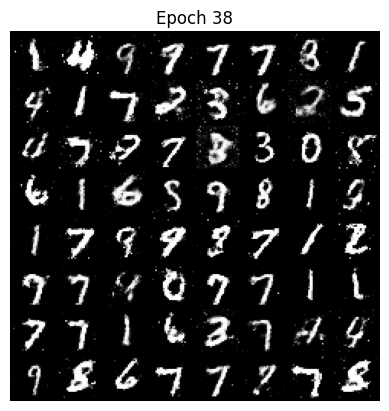

Epoch [39/50] Batch 0/469: D Loss: 1.2673, G Loss: 0.8201
Epoch [39/50] Batch 200/469: D Loss: 1.2341, G Loss: 1.0128
Epoch [39/50] Batch 400/469: D Loss: 1.2441, G Loss: 1.2907


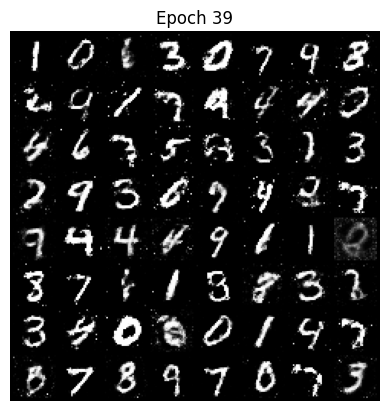

Epoch [40/50] Batch 0/469: D Loss: 1.2115, G Loss: 0.9114
Epoch [40/50] Batch 200/469: D Loss: 1.1859, G Loss: 0.9438
Epoch [40/50] Batch 400/469: D Loss: 1.1227, G Loss: 0.9977


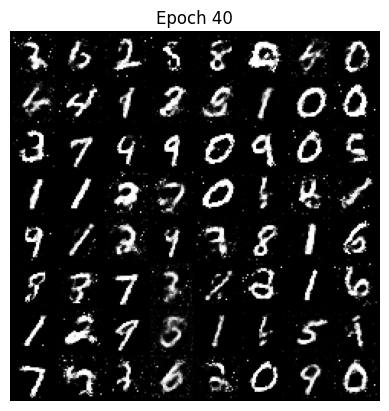

Epoch [41/50] Batch 0/469: D Loss: 1.2011, G Loss: 0.8625
Epoch [41/50] Batch 200/469: D Loss: 1.1807, G Loss: 0.9787
Epoch [41/50] Batch 400/469: D Loss: 1.2121, G Loss: 0.8811


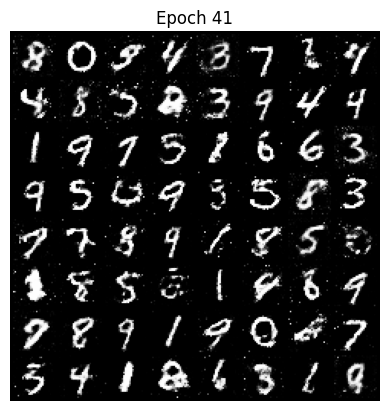

Epoch [42/50] Batch 0/469: D Loss: 1.2391, G Loss: 1.1547
Epoch [42/50] Batch 200/469: D Loss: 1.1289, G Loss: 0.9733
Epoch [42/50] Batch 400/469: D Loss: 1.1604, G Loss: 1.0548


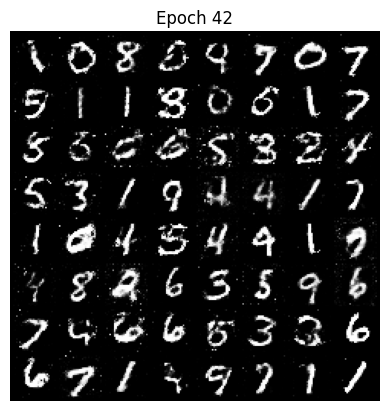

Epoch [43/50] Batch 0/469: D Loss: 1.3003, G Loss: 0.9874
Epoch [43/50] Batch 200/469: D Loss: 1.2130, G Loss: 1.0234
Epoch [43/50] Batch 400/469: D Loss: 1.1890, G Loss: 0.9869


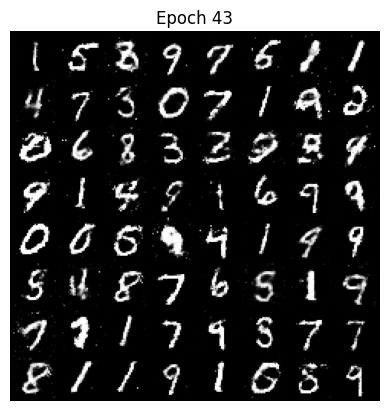

Epoch [44/50] Batch 0/469: D Loss: 1.1484, G Loss: 1.0334
Epoch [44/50] Batch 200/469: D Loss: 1.2933, G Loss: 0.8339
Epoch [44/50] Batch 400/469: D Loss: 1.1395, G Loss: 1.1017


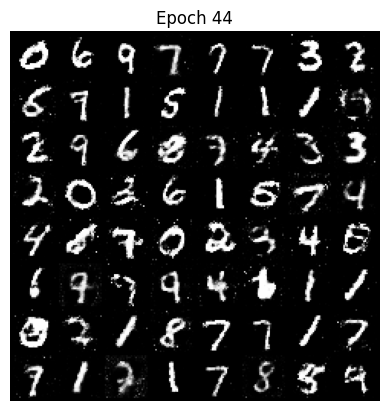

Epoch [45/50] Batch 0/469: D Loss: 1.1713, G Loss: 1.0844
Epoch [45/50] Batch 200/469: D Loss: 1.2054, G Loss: 1.2359
Epoch [45/50] Batch 400/469: D Loss: 1.2434, G Loss: 1.1032


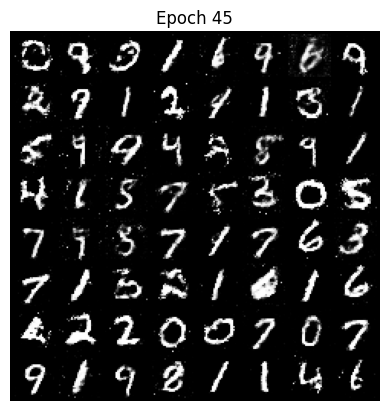

Epoch [46/50] Batch 0/469: D Loss: 1.1872, G Loss: 0.8920
Epoch [46/50] Batch 200/469: D Loss: 1.2323, G Loss: 0.8781
Epoch [46/50] Batch 400/469: D Loss: 1.1435, G Loss: 0.9758


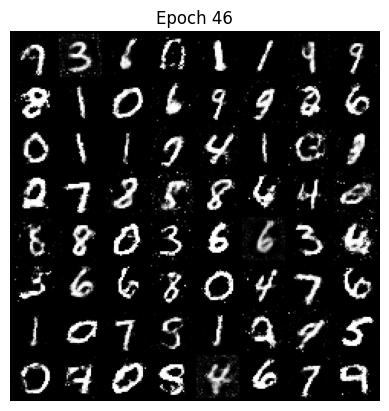

Epoch [47/50] Batch 0/469: D Loss: 1.1710, G Loss: 1.2854
Epoch [47/50] Batch 200/469: D Loss: 1.2575, G Loss: 1.0773
Epoch [47/50] Batch 400/469: D Loss: 1.2365, G Loss: 1.0425


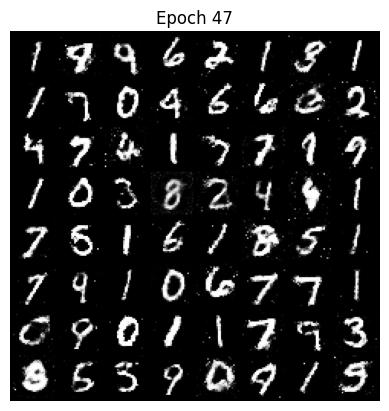

Epoch [48/50] Batch 0/469: D Loss: 1.2247, G Loss: 0.9527
Epoch [48/50] Batch 200/469: D Loss: 1.1682, G Loss: 0.9364
Epoch [48/50] Batch 400/469: D Loss: 1.1916, G Loss: 0.9916


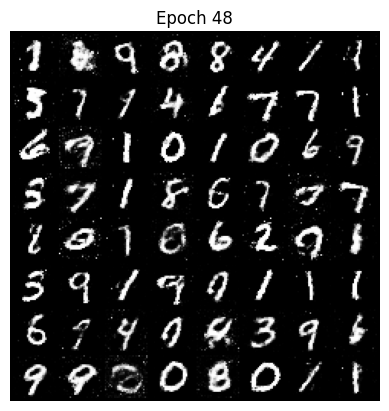

Epoch [49/50] Batch 0/469: D Loss: 1.1129, G Loss: 0.8427
Epoch [49/50] Batch 200/469: D Loss: 1.1121, G Loss: 0.9190
Epoch [49/50] Batch 400/469: D Loss: 1.2003, G Loss: 1.0346


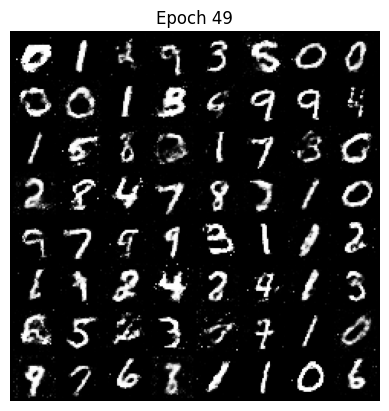

Epoch [50/50] Batch 0/469: D Loss: 1.2492, G Loss: 0.9455
Epoch [50/50] Batch 200/469: D Loss: 1.1941, G Loss: 0.9336
Epoch [50/50] Batch 400/469: D Loss: 1.1832, G Loss: 0.9769


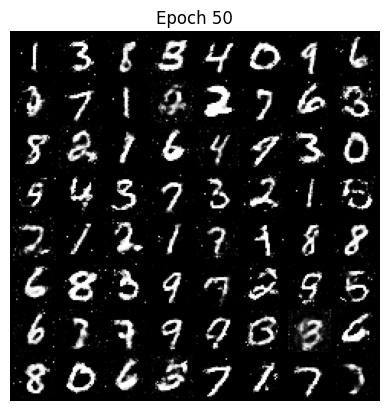

In [ ]:
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):
        real_imgs = imgs.to(device)
        real_labels = torch.ones(imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(imgs.size(0), 1).to(device)

        optimizer_D.zero_grad()
        outputs = discriminator(real_imgs)
        d_loss_real = criterion(outputs, real_labels)

        noise = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = generator(noise)
        outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        optimizer_G.zero_grad()
        noise = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = generator(noise)
        outputs = discriminator(fake_imgs)
        g_loss = criterion(outputs, real_labels)

        g_loss.backward()
        optimizer_G.step()

        g_loss_list.append(g_loss.item())
        d_loss_list.append(d_loss.item())

        if i % 200 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] Batch {i}/{len(dataloader)}: D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    generate_and_save_images(epoch+1)